<a href="https://colab.research.google.com/github/LAIBA-FATIMA-25/Machine-Learning-Labs/blob/main/LAB_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the uploaded file


In [ ]:
import pandas as pd

file_path = '/content/laptop_data_cleaned.csv'
data = pd.read_csv(file_path)

# Display the first few rows

In [ ]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


# Checking for missing values

In [ ]:
missing_values = data.isnull().sum()


# Checking data types

In [ ]:
# Checking data types
data_types = data.dtypes
missing_values, data_types

(Company        0
 TypeName       0
 Ram            0
 Weight         0
 Price          0
 TouchScreen    0
 Ips            0
 Ppi            0
 Cpu_brand      0
 HDD            0
 SSD            0
 Gpu_brand      0
 Os             0
 dtype: int64,
 Company         object
 TypeName        object
 Ram              int64
 Weight         float64
 Price          float64
 TouchScreen      int64
 Ips              int64
 Ppi            float64
 Cpu_brand       object
 HDD              int64
 SSD              int64
 Gpu_brand       object
 Os              object
 dtype: object)

# Selecting only numerical columns for correlation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculating correlation matrix



In [ ]:

correlation_matrix = numeric_data.corr()


# Plotting heatmap


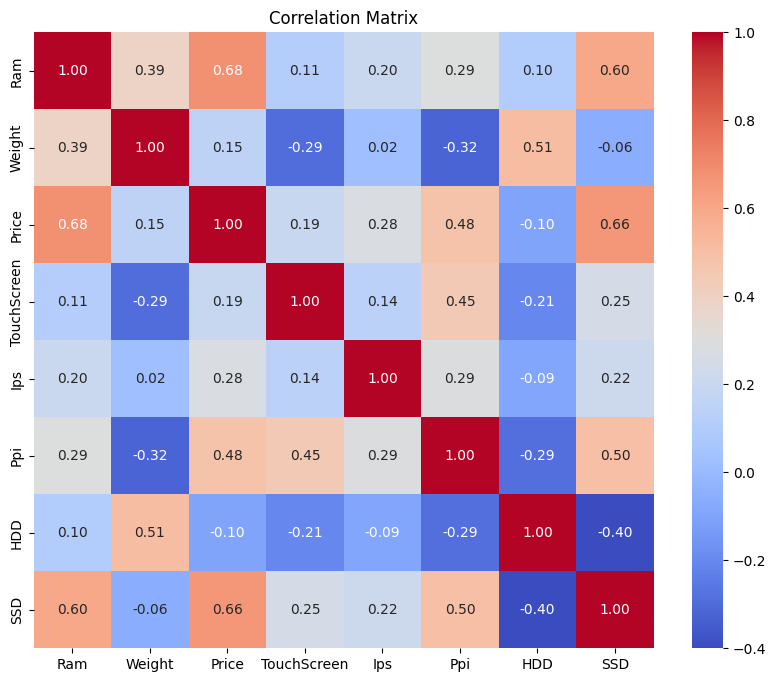

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# ***Preprocessing, One-Hot Encoding, Normalization, Standardization, Splitting***

**1. Import Libraries**

In [ ]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

**2. Load the CSV file (already uploaded)**

In [ ]:

file_path = '/content/laptop_data_cleaned.csv'
data = pd.read_csv(file_path)

**3. Separate features and target**

In [ ]:

X = data.drop('Price', axis=1)  # Target = 'Price'
y = data['Price']

**4. One-hot encode categorical features**

In [ ]:

categorical_cols = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


**5. Normalization (Min-Max Scaling)**

In [ ]:

scaler_norm = MinMaxScaler()
X_normalized = scaler_norm.fit_transform(X_encoded)

**6. Standardization (Z-score)**

In [ ]:

scaler_std = StandardScaler()
X_standardized = scaler_std.fit_transform(X_encoded)


 **7. Splitting data (80% train, 20% test)
 Normalized**

In [ ]:

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

 ***Standardized***

In [ ]:

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(
    X_standardized, y, test_size=0.2, random_state=42
)

**8. Check shapes**

In [ ]:

print("Encoded Feature Shape:", X_encoded.shape)
print("Normalized Train/Test:", X_train_norm.shape, X_test_norm.shape)
print("Standardized Train/Test:", X_train_std.shape, X_test_std.shape)

Encoded Feature Shape: (1273, 38)
Normalized Train/Test: (1018, 38) (255, 38)
Standardized Train/Test: (1018, 38) (255, 38)


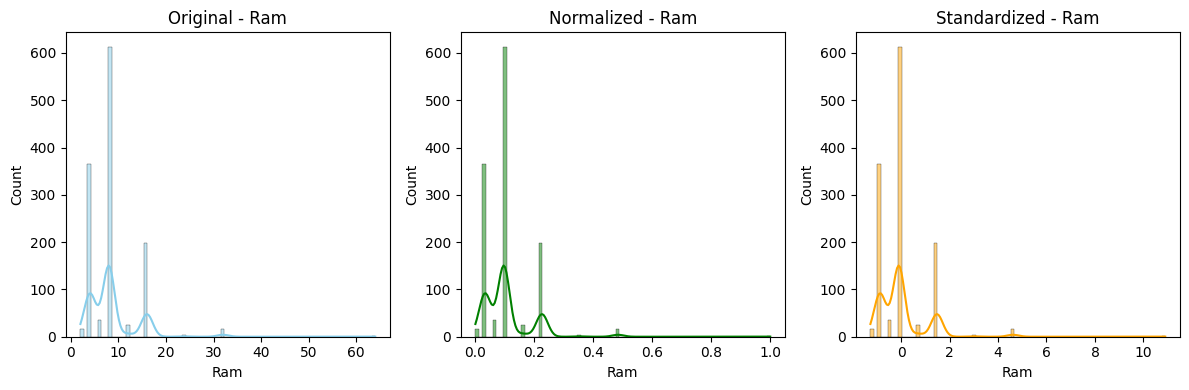

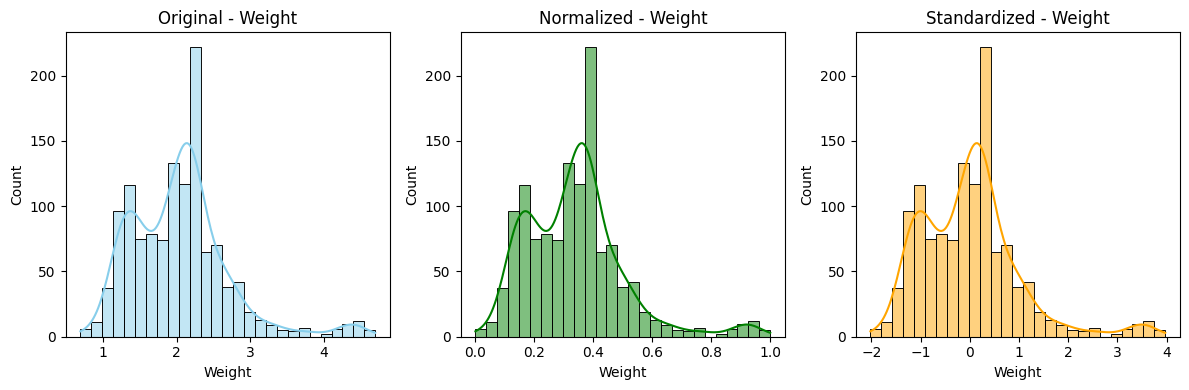

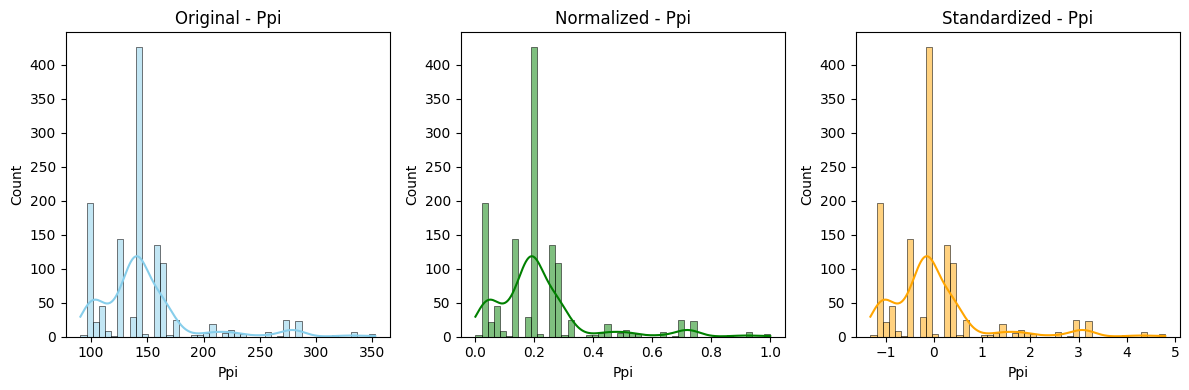

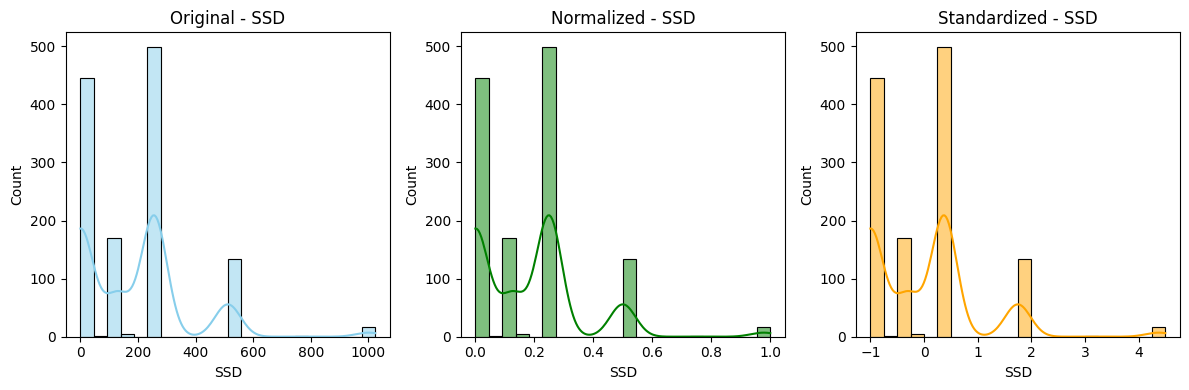

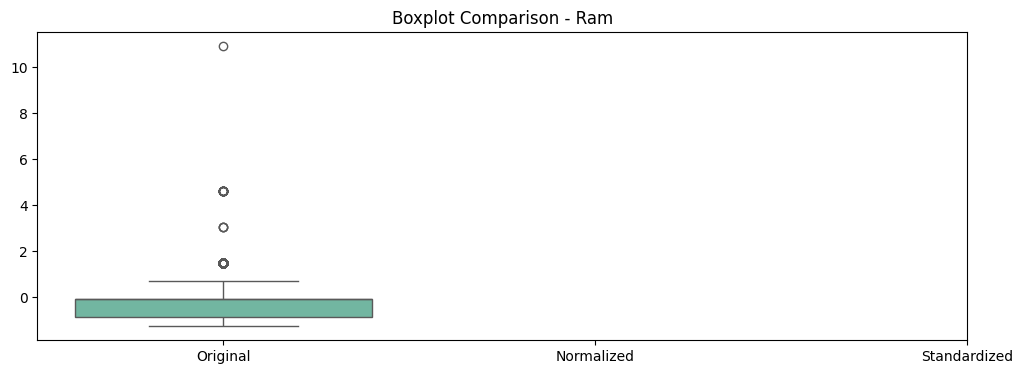

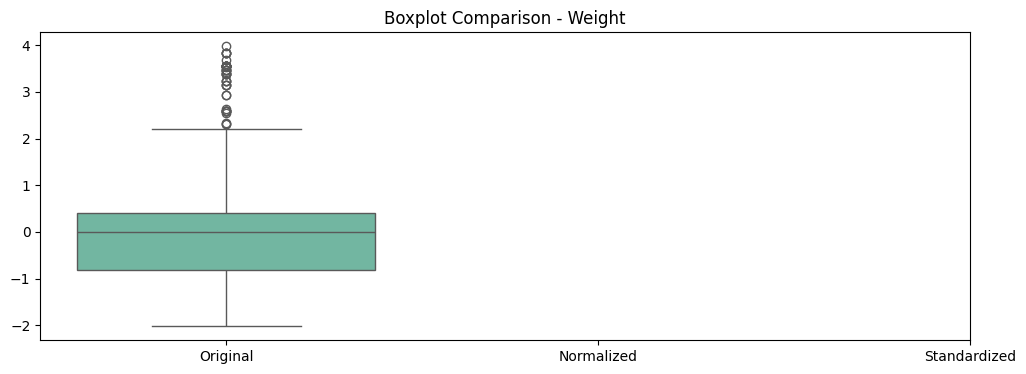

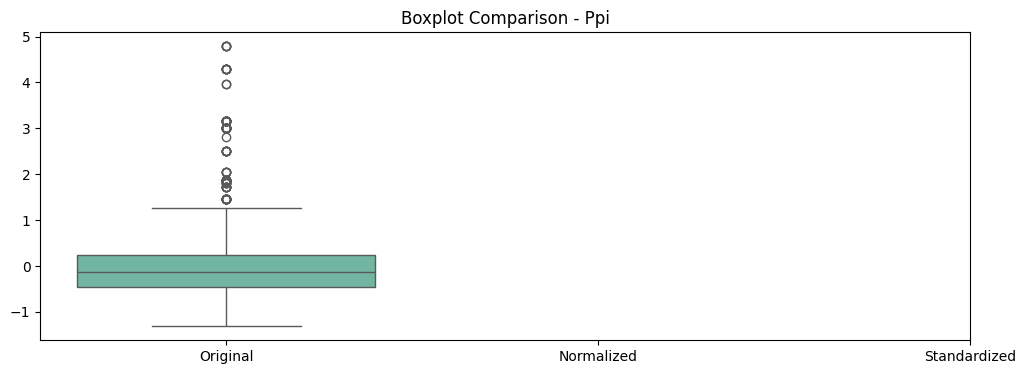

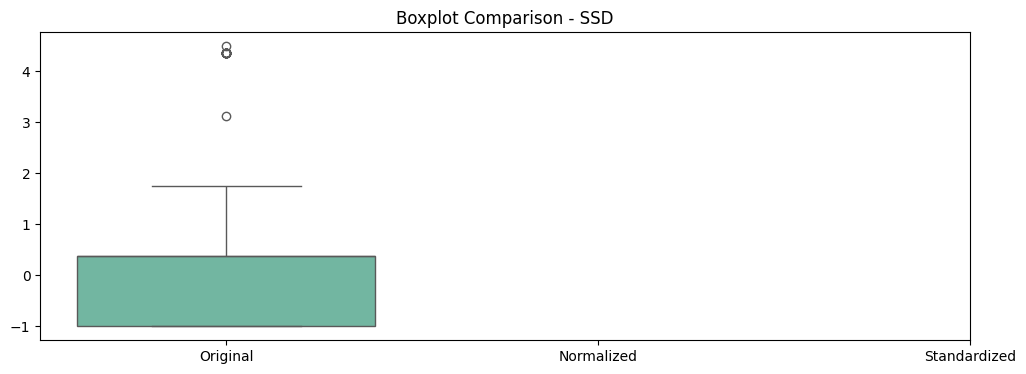

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


features_to_plot = ['Ram', 'Weight', 'Ppi', 'SSD']


X_norm_df = pd.DataFrame(X_normalized, columns=X_encoded.columns)
X_std_df = pd.DataFrame(X_standardized, columns=X_encoded.columns)


for feature in features_to_plot:
    plt.figure(figsize=(12, 4))


    plt.subplot(1, 3, 1)
    sns.histplot(X_encoded[feature], kde=True, color='skyblue')
    plt.title(f'Original - {feature}')


    plt.subplot(1, 3, 2)
    sns.histplot(X_norm_df[feature], kde=True, color='green')
    plt.title(f'Normalized - {feature}')

    plt.subplot(1, 3, 3)
    sns.histplot(X_std_df[feature], kde=True, color='orange')
    plt.title(f'Standardized - {feature}')

    plt.tight_layout()
    plt.show()

for feature in features_to_plot:
    plt.figure(figsize=(12, 4))

    sns.boxplot(data=[X_encoded[feature], X_norm_df[feature], X_std_df[feature]],
                palette='Set2')
    plt.xticks([0, 1, 2], ['Original', 'Normalized', 'Standardized'])
    plt.title(f'Boxplot Comparison - {feature}')
    plt.show()
